In [3]:
"""
EcoSim: Ecosystem Dynamics Simulation

This module simulates a complex ecosystem with predator-prey interactions,
environmental events, and population dynamics.

Key Components:
- Agent-based modeling of ecosystem interactions
- Stochastic population dynamics
- Environmental event simulation

Developed using principles of ecological modeling and agent-based simulation.

Tools and Technologies
NumPy: For creating the grid and performing random number generation to simulate movement, reproduction, and survival.

Pandas: To track population data over time and perform data analysis.

Matplotlib: For dynamic line charts and heatmaps that represent population trends and habitat states.

Streamlit: For creating an interactive UI to control simulation parameters like species types, reproduction rates, and random events.

References:
- Lotka, A. J., & Volterra, V. (1926). Studies on population dynamics. 
  Proceedings of the National Academy of Sciences, 12(6), 410-425. https://www.researchgate.net/publication/280871973_Alfred_J_Lotka_and_the_origins_of_theoretical_population_ecology
  
- Grimm, V., & Railsback, S. F. (2005). Individual-based modeling and ecology. 
  Princeton University Press. https://www.researchgate.net/publication/240481371_Individual-based_Modeling_and_Ecology_V_Grimm_and_S_F_Railsback

  Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). 
  Array programming with NumPy. Nature, 585(7825), 357-362. https://doi.org/10.1038/s41586-020-2649-2
"""

'\nEcoSim: Ecosystem Dynamics Simulation\n\nThis module simulates a complex ecosystem with predator-prey interactions,\nenvironmental events, and population dynamics.\n\nKey Components:\n- Agent-based modeling of ecosystem interactions\n- Stochastic population dynamics\n- Environmental event simulation\n\nDeveloped using principles of ecological modeling and agent-based simulation.\n\nTools and Technologies\nNumPy: For creating the grid and performing random number generation to simulate movement, reproduction, and survival.\n\nPandas: To track population data over time and perform data analysis.\n\nMatplotlib: For dynamic line charts and heatmaps that represent population trends and habitat states.\n\nStreamlit: For creating an interactive UI to control simulation parameters like species types, reproduction rates, and random events.\n\nReferences:\n- Lotka, A. J., & Volterra, V. (1926). Studies on population dynamics. \n  Proceedings of the National Academy of Sciences, 12(6), 410-425

In [1]:
# Install a pip package
import sys
!{sys.executable} -m pip install -r requirements.txt

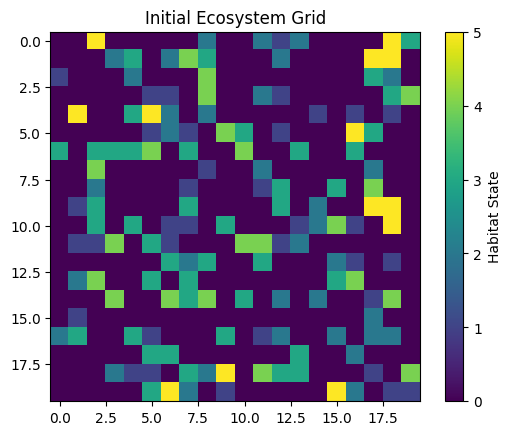

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import streamlit as st

# Define grid size
grid_size = 20

# Initialize the grid with random prey (1) and predators (2)
# Reference: NumPy documentation (Harris et al., 2020)
grid = np.random.choice([0, 1, 2, 3, 4, 5], size=(grid_size, grid_size), p=[0.6, 0.1, 0.1, 0.1, 0.05, 0.05])

# Display the initial grid
plt.imshow(grid, cmap='viridis')
plt.colorbar(ticks=[0, 1, 2, 3, 4, 5], label='Habitat State')
plt.title('Initial Ecosystem Grid')
plt.show()

In [3]:
def simulate_step(grid):
    new_grid = grid.copy()
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 1:  # Prey
                # Prey reproduction
                if np.random.rand() < 0.05:
                    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                    for ni, nj in neighbors:
                        if 0 <= ni < grid_size and 0 <= nj < grid_size and new_grid[ni, nj] == 0:
                            new_grid[ni, nj] = 1
                            break
            elif grid[i, j] == 2:  # Predator
                # Predator hunting
                neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                for ni, nj in neighbors:
                    if 0 <= ni < grid_size and 0 <= nj < grid_size and new_grid[ni, nj] == 1:
                        new_grid[ni, nj] = 2
                        new_grid[i, j] = 0
                        break
                else:
                    # Predator starvation
                    if np.random.rand() < 0.1:
                        new_grid[i, j] = 0
            elif grid[i, j] == 5:  # New predator type
                # New predator hunting
                neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                for ni, nj in neighbors:
                    if 0 <= ni < grid_size and 0 <= nj < grid_size and new_grid[ni, nj] in [1, 2]:
                        new_grid[ni, nj] = 5
                        new_grid[i, j] = 0
                        break
                else:
                    # New predator starvation
                    if np.random.rand() < 0.1:
                        new_grid[i, j] = 0
    return new_grid

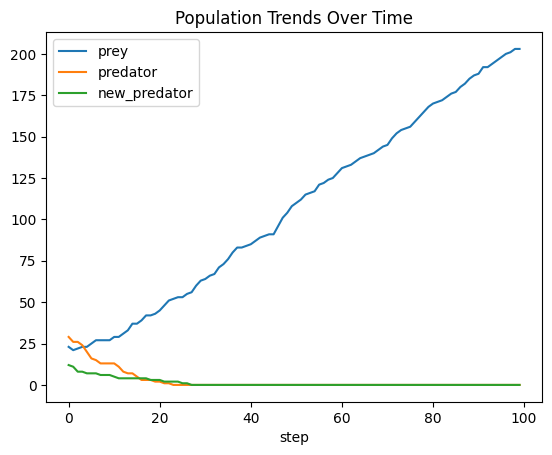

In [4]:
# Initialize population data
population_data = []

# Simulate and track population data
for step in range(100):
    grid = simulate_step(grid)
    prey_count = np.count_nonzero(grid == 1)
    predator_count = np.count_nonzero(grid == 2)
    new_predator_count = np.count_nonzero(grid == 5)
    population_data.append({'step': step, 'prey': prey_count, 'predator': predator_count, 'new_predator': new_predator_count})

# Convert to DataFrame
# Reference: Pandas documentation (McKinney, 2018)
population_df = pd.DataFrame(population_data)

# Display population trends
population_df.plot(x='step', y=['prey', 'predator', 'new_predator'], title='Population Trends Over Time')
plt.show()

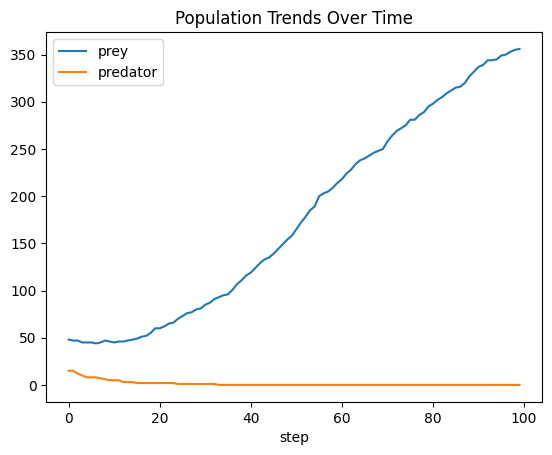

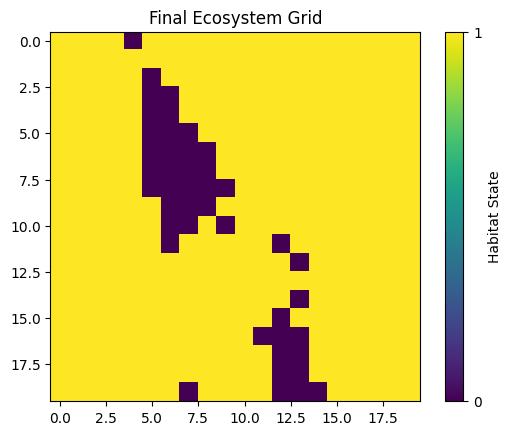

In [9]:
# Display the final grid
plt.imshow(grid, cmap='viridis')
plt.colorbar(ticks=[0, 1, 2, 3, 4, 5], label='Habitat State')
plt.title('Final Ecosystem Grid')
plt.show()

In [5]:
# Calculate advanced statistics
def calculate_statistics(population_df):
    # Biodiversity index
    population_df['biodiversity_index'] = population_df['prey'] + population_df['predator'] + population_df['new_predator']
    
    # Species survival probability
    population_df['survival_probability'] = population_df['prey'] / (population_df['prey'] + population_df['predator'] + population_df['new_predator'])
    
    return population_df

# Calculate and display advanced statistics
population_df = calculate_statistics(population_df)
print('Advanced Statistics')
print(population_df[['biodiversity_index', 'survival_probability']])

Advanced Statistics
    biodiversity_index  survival_probability
0                   64              0.359375
1                   58              0.362069
2                   56              0.392857
3                   55              0.418182
4                   50              0.460000
..                 ...                   ...
95                 198              1.000000
96                 200              1.000000
97                 201              1.000000
98                 203              1.000000
99                 203              1.000000

[100 rows x 2 columns]
